In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
import random

<IPython.core.display.Javascript object>


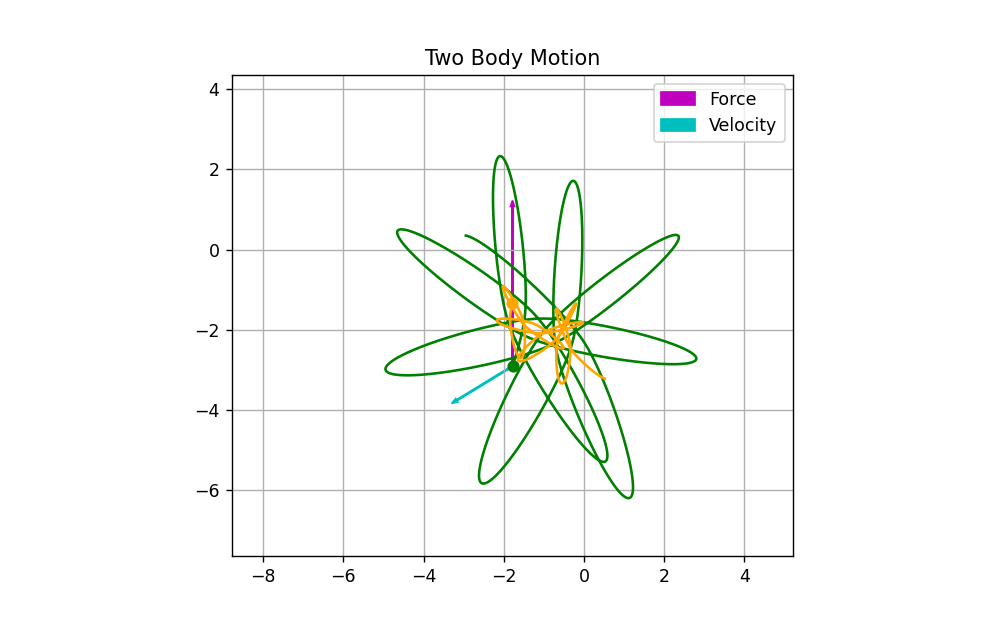

In [103]:
# Force on a by b
def fab(a,b,k,n):
    x=a-b
    r=(x[0]**2 + x[1]**2)**(1/2)
    f= -1*k*r**n
    fv=f*x/r
    return fv

# Initialize the values 

n=-0.5
k=50
ma=2
mb=8
a=np.array([random.uniform(-3,3),random.uniform(-3.0,3.0)]) # ini pos
b=np.array([random.uniform(-4,4),random.uniform(-3.5,1.5)])
va=np.array([random.uniform(-1.5,1.5),random.uniform(-1.5,1.5)]) # ini vel
vb=np.array([random.uniform(-0.5,0.5),random.uniform(-0.5,0.5)])
delt=0.001
s=1
t=0
t_max=30

#plt.rcParams["figure.figsize"] = 8,5
fig=plt.figure()                     # create a figure with axes
ax=plt.axes(xlim=(-10*s,10*s),ylim=(-10*s,10*s))
ax.set_aspect("equal")               # set equal aspect such that a circle is not shown as ellipse

pta, = plt.plot([],[], marker="o", color="green")
patha, = plt.plot([],[], color="green")
ptb, = plt.plot([],[], marker="o", color="orange")
pathb, = plt.plot([],[], color="orange")
fara = plt.arrow([],[],[],[],head_width = 0.1,width = 0.03,color ='m', label="Force")
vara = plt.arrow([],[],[],[],head_width = 0.1,width = 0.03,color ='c', label="Velocity")

ts=[]
aes,bs,vas,vbs=[],[],[],[]
Rs=[]
fa,fb=[],[]

while t<t_max:
    a+=va*delt
    b+=vb*delt
    forceab=fab(a,b,k,n)
    forceba=fab(b,a,k,n)
    va+= forceab*delt/ma
    vb+= forceba*delt/mb
    t+=delt
    
    R=(ma*a+mb*b)/(ma+mb) # Posn of CM 
    Rs.append(R)
    
    ts.append(t)
    vas.append(va.copy())
    vbs.append(vb.copy())
    aes.append(a.copy())
    bs.append(b.copy())
    fa.append(forceab.copy())
    fb.append(forceba.copy())
    
def updt(i):
    ax,ay=aes[i]
    bx,by=bs[i]
    pax=[l[0] for l in aes[:i]]
    pay=[l[1] for l in aes[:i]]
    pbx=[l[0] for l in bs[:i]]
    pby=[l[1] for l in bs[:i]]
    pta.set_data([ax],[ay])
    ptb.set_data([bx],[by])
    patha.set_data([pax], [pay])
    pathb.set_data([pbx], [pby])
    
    # Updating axes acc to CM
    Rx,Ry=Rs[i]
    patha.axes.set_xlim(Rx-7,Rx+7)
    patha.axes.set_ylim(Ry-6,Ry+6)
    
    # Updating arrows
    fara.set_data(x=ax,y=ay,dx=0.1*fa[i][0],dy=0.1*fa[i][1])
    vara.set_data(x=ax,y=ay,dx=0.5*vas[i][0],dy=0.1*vas[i][1])
    
    return pta, ptb, pathb, patha

anim = FuncAnimation(fig, updt, interval=10, blit=True, repeat=True, frames=np.arange(0,len(aes),40))
#anim.save("with arrows.gif")
plt.title("Two Body Motion")
plt.legend()
plt.grid()
plt.show()


In [97]:
anim.save("With Arrows.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


<IPython.core.display.Javascript object>


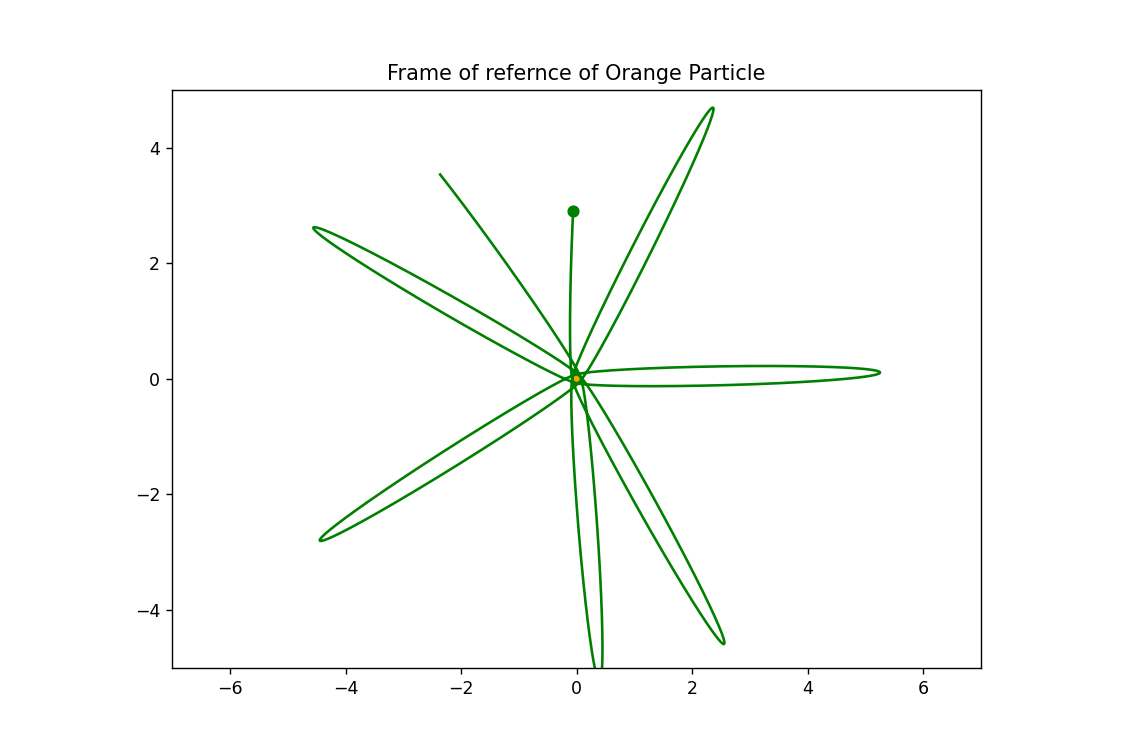

In [25]:
# relative posn

delx,dely=[],[]
for i in range(0,len(aes)):
    c=aes[i]-bs[i]
    x,y=c
    delx.append(x)
    dely.append(y)

s=0.5
plt.rcParams["figure.figsize"] = 9,6
fig, ax = plt.subplots()             # create a figure with axes
ax.axis([-14*s,14*s,-10*s,10*s])     # set the axes limits
ax.set_aspect("equal")    

center, =ax.plot(0,0, marker="o", color="orange")
pt, =ax.plot([],[], marker="o", color="green")
path, = ax.plot([],[], color="green")


def updt2(i):
    x=delx[i]
    y=dely[i]
    px=delx[:i]
    py=dely[:i]
    pt.set_data([x],[y])
    path.set_data([px],[py])
    return pt, path

ani = FuncAnimation(fig, updt2, interval=10, blit=True, repeat=True, frames=np.arange(0,len(aes),100))

plt.title("Frame of refernce of Orange Particle")
plt.show()

<IPython.core.display.Javascript object>


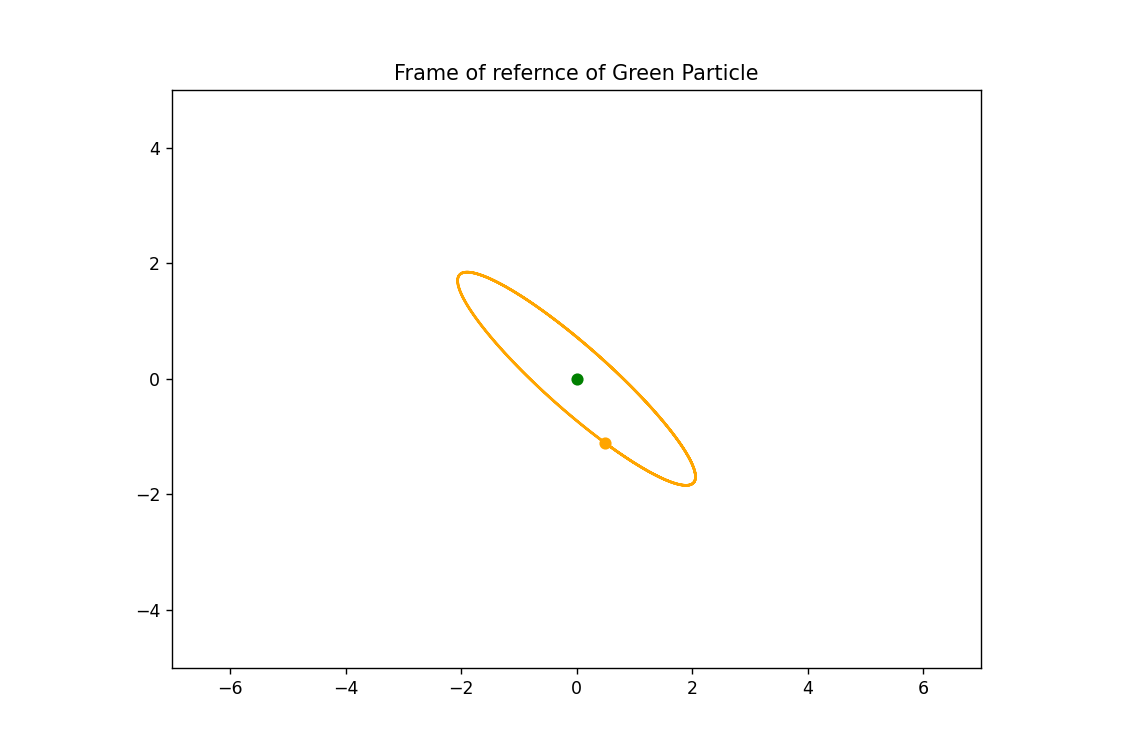

In [57]:
# relative posn 2

delx,dely=[],[]
for i in range(0,len(aes)):
    c=bs[i]-aes[i]
    x,y=c
    delx.append(x)
    dely.append(y)

s=0.5
plt.rcParams["figure.figsize"] = 9,6
fig, ax = plt.subplots()             # create a figure with axes
ax.axis([-14*s,14*s,-10*s,10*s])     # set the axes limits
ax.set_aspect("equal")    

center, =ax.plot(0,0, marker="o", color="green")
pt, =ax.plot([],[], marker="o", color="orange")
path, = ax.plot([],[], color="orange")


def updt2(i):
    x=delx[i]
    y=dely[i]
    px=delx[:i]
    py=dely[:i]
    pt.set_data([x],[y])
    path.set_data([px],[py])
    return pt, path

ani = FuncAnimation(fig, updt2, interval=10, blit=True, repeat=True, frames=np.arange(0,len(aes),50))

plt.title("Frame of refernce of Green Particle")
plt.show()

In [20]:
r=float(random.uniform(-1.5,1.5))
print(r)
print([5,5]+[9,0,8])

0.4060364585295486
[5, 5, 9, 0, 8]
